# Lecture

## What is special about time series

In classic definition, time series is a scalar feature that is measured at a regular time interval. Typically, in this scenario we are interested to forecast the time series. We can do point forecast, or forecast a distribution (an interval).

In other machine learning tasks we assume that data is i.i.d., while for time series we hope for the opposite.

## Time series analysis

Time series analysis is pretty much like statistics: you are given data, and you'd like to understand what is the model behind it. Similar to statistics being built on top of probability theory, time series analysis is built on top of stochastic calculus.

## Stochastic processes

Stochastic process can be described as "a statistical phenomenon that evolves in time according to probabilistic laws". Mathematically, a stochastic process may be defined as a collection of random variables that are ordered in time and defined at a set of time points, which may be continuous or discrete. We will denote the random variable at time $t$ by $X(t)$ if time is continuous (usually $−\infty<t<\infty$), and by $X_t$ if time is discrete (usually $t=0, \pm1, \pm2, \ldots$)

We may regard the observed time series as just one realization of the infinite set of time series that might have been observed.

## Description of stochastic processes

Many models for stochastic processes are expressed by means of an algebraic formula relating the random variable at time $t$ to past values of the process, together with values of an unobservable "error" process:
$$
X_t = f(X_{t-1}, X_{t-2}, \ldots) + g(Z_{t}, Z_{t-1}, \ldots)
$$

From this model, it may be possible to specify the joint probability distribution of $X(t_1), \ldots, X(t_k)$ for any set of times $t_1, \ldots, t_k$ and any value of $k$. However, this is rather complicated and is not usually attempted in practice. A simpler, more useful way of describing a stochastic process is to give the moments of the process, particularly the
- mean function $\mu(t) = \mathbb{E}[X(t)]$
- autocovariance function (acv.f.) $\gamma(t_1, t_2) = \mathbb{E}[(X(t_1) - \mu(t_1)) (X(t_2) - \mu(t_2))]$
- variance function is a special case of the acv.f. when $t_1 = t_2$

## Stationarity

An important class of stochastic processes are those that are stationary. A heuristic idea of stationarity is that a time series is said to be stationary if there is no systematic change in mean (no trend), if there is no systematic change in variance and if strictly periodic variations have been removed. In other words, the properties of one section of the data are much like those of any other section.

A time series is said to be strictly stationary if the joint distribution of $X(t_1), \ldots, X(t_k)$ is the same as the joint distribution $X (t_{1+\tau}), \ldots,X(t_{k+\tau})$, i.e. shifting the origin does not influence the distribution. Strict stationarity implies that mean and varaince are constant, and for $k=2$ the acv.f. only depends on the difference $t = t_2 - t_1$:
$$
\gamma(t) = \mathbb{E}[(X(t_1) - \mu) (X(t_1 + t) - \mu)]
$$

The size of an autocovariance coefficient depends on the units in which $X(t)$ is measured. Thus, for interpretative purposes, it is helpful to standardize the acv.f. to produce a function called the autocorrelation function (ac.f.), which is defined by
$$
\rho(t) = \gamma(t) / \gamma(0)
$$

In practice it is often useful to define stationarity in a less restricted way than that described above. A process is called second-order stationary (or weakly stationary) if its mean is constant and its acv.f. depends only on the lag. This weaker definition of stationarity will generally be used from now on if not stated otherwise.s

## Properties of ACF

Consider stationary process $X(t)$ with mean $\mu`$, variance $\sigma^2$, then
$$
\rho(t) = \gamma(t) / \gamma(0) = \gamma(t) / \sigma^2
$$

- $\rho(0) = 1$
- $\rho(t) = \rho(-t)$
- $|\rho(t)| \leqslant 1$
- The ac.f. does not uniquely identify the underlying model

## Examples

### White noise

A purely random process is a sequence of i.i.d. r.v.s $Z_0, Z_1, \ldots$. We will further assume $Z_t \sim \mathcal{N}(0, \sigma^2_Z)$. Such process is often called white noise. Such process has constant mean and variance, and the independence assumption means that
$$
\gamma(k) = \operatorname{Cov}(Z_t, Z_{t+k}) = \begin{cases}
\sigma^2_Z, & k = 0, \\
0, & k \neq 0
\end{cases}
$$

As the mean and acv.f. do not depend on time, the process is stationary.

It is widely used as a building block for more complex processes.

### Random walk

Suppose that $Z_t$ is a discrete-time, white noise process with mean $\mu$ and variance $\sigma^2_Z$. A process $X_t$ is then said to be a random walk if
$$
X_t = X_{t-1} + Z_t
$$

If we additionally set $X_0 = 0$, then $X_t = \sum_{i=1}^t Z_i$. So, the mean of the process is $\mathbb{E}[X_t] = t \mu$ and the variance is $\operatorname{Var}(X_t) = t \sigma^2_Z$. The process is thus non-stationary.

The best-known examples of time series, which behave like random walks, are share prices on successive days.

### MA process

Suppose that $Z_t$ is a purely random process with mean zero and variance $\sigma^2_Z$. Then a process $X_t$ is said to be a moving average process of order $q$, $MA(q)$, if
$$
X_t = \beta_0 Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q},
$$
where $\beta$s are constants. Typically, the series is scaled so that $\beta_0 = 1$.

As a sum of WN processes, $\mathbb{E}[X_t] = 0$ and $\operatorname{Var}(X_t) = \sigma^2_Z \sum_{i=0}^q \beta_i^2$. The acv.f. is given by
$$
\begin{aligned}
\gamma(k) & = \operatorname{Cov}(X_t, X_{t+k}) = \\
& = \operatorname{Cov}(\beta_0 Z_t + \beta_1 Z_{t-1} + \ldots + \beta_q Z_{t-q}, \beta_0 Z_{t+k} + \beta_1 Z_{t+k-1} + \ldots + \beta_q Z_{t+k-q}) = \\
& = \begin{cases}
0, & k > q, \\
\sigma^2_Z \sum\limits_{i=0}^{q-k} \beta_i \beta_{i+k}, & 0 \leqslant k \leqslant q, \\
\gamma(-k), & k < 0
\end{cases}
\end{aligned}
$$

The ac.f. is given by
$$
\rho(k) = \begin{cases}
1, & k = 0, \\
\sum\limits_{i=0}^{q-k} \beta_i \beta_{i+k} \big/\sum\limits_{i=0}^{q} \beta_i^2 , & 1 \leqslant k \leqslant q, \\
0, & k > q, \\
\gamma(-k), & k < 0
\end{cases}
$$

The process is thus stationary. No restrictions on the $\beta$s are required for a (finite-order) MA process to be stationary, but it is generally desirable to impose restrictions on the $\beta$s to ensure that the process satisfies a condition called invertibility.

### Invertibility

A process $X_t$ is said to be invertible if the random disturbance $Z_t$ can be expressed as a convergent sum of present and past values of $X_t$ in the form
$$
Z_t = \sum_{j=0}^\infty \pi_j X_{t-j}, \text{ where } \sum_{j=0}^\infty | \pi_j | < \infty
$$

We can express the same condition using backward shift operator $B^j$ defined as $B^j X_t = X_{t-j}$, as follows:
$$
X_t = (\beta_0 + \beta_1 B + \ldots + \beta_q B^q) Z_t = \theta(B) Z_t
$$

It can be shown that an $MA(q)$ process is invertible if the complex roots of the equation $\theta(x) = 0$ lie outside the unit circle.

### MA process

MA processes have been used in many areas, particularly econometrics. For example, economic indicators are affected by a variety of ‘random’ events such as strikes, government decisions, shortages of key materials and so on. Such events will not only have an immediate effect but may also affect economic indicators to a lesser extent in several subsequent periods, and so it is at least plausible that an MA process may be appropriate.

### AR process

Suppose that $Z_t$ is a WN with mean zero and variance $\sigma^2_Z$. Then a process $X_t$ is said to be an autoregressive process of order $p$, $AR(p)$, if
$$
X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
$$

Using the backward shift operator, the definition is
$$
(1 - \alpha_1 B - \ldots - \alpha_p B^p) X_t = Z_t
$$
or
$$
X_t = (1 - \alpha_1 B - \ldots - \alpha_p B^p)^{-1} Z_t = (1 + \beta_1 B + \beta_2 B^2 + \ldots)^{-1} Z_t = f(B) Z_t
$$

As a sum of WN processes, $\mathbb{E}[X_t] = 0$ and variance converges provided that $\sum_{i=0}^\infty \beta_i^2$ converges. The acv.f. is given by
$$
\gamma(k) = \sigma^2_Z \sum_{i=0}^\infty \beta_i \beta_{i+k}
$$

A sufficient condition for this to converge, and hence for stationarity, is that $\sum_{i=0}^\infty |\beta_i|$ converges.

## AR process

$$
X_t = \alpha_1 X_{t-1} + \ldots + \alpha_p X_{t-p} + Z_t
$$

Let's assume that $AR(p)$ process is stationary, then multiply by $X_{t-k}$, take expectation, divide by $\sigma^2_X$:
$$
\begin{aligned}
\rho(k) & = \frac{1}{\sigma^2_X} \mathbb{E}[X_t X_{t-k}] = \\
& = \alpha_1 \frac{1}{\sigma^2_X} \mathbb{E}[X_{t-1} X_{t-k}] + \ldots + \alpha_p \frac{1}{\sigma^2_X} \mathbb{E}[X_{t-p} X_{t-k}] + \frac{1}{\sigma^2_X} \mathbb{E}[Z_t X_{t-k}] = \\
& = \alpha_1 \rho(k-1) + \ldots + \alpha_p \rho(k-p)
\end{aligned}
$$

These are Yule-Walker equations. The general solution is
$$
\rho(k) = A_1 \pi_1^{|k|} + \ldots + A_p \pi_p^{|k|}
$$
where $\pi_i$ are the roots of the so-called auxiliary equation
$$
y^p - \alpha_1 y^{p-1} - \ldots - \alpha_p = 0
$$

The coefficients $A_i$ are to be chosen to satisfy the initial conditions depending on $\rho(0)=1$, which means that $\sum_{i=1}^p A_i=1$. The first $(p−1)$ Yule-Walker equations provide $(p−1)$ further restrictions on the {Ai} using $\rho(0)=1$ and $\rho(k)=\rho(−k)$.

From the general form of $\rho(k)$, it is clear that $\rho(k)$ tends to zero as $k$ increases provided that $|\pi_i|<1$ for all $i$, and this is a necessary and sufficient condition for the process to be stationary. It can be shown that an equivalent way of expressing the stationarity condition is to say that the roots of the following equation must lie outside the unit circle
$$
\phi(B) = 1 - \alpha_1 B - \ldots - \alpha_p B^p = 0
$$

AR processes have been applied to many situations in which it is reasonable to assume that the present value of a time series depends linearly on the immediate past values together with a random error.

# Webinar

## Types of variation

- Trend: long-term change in the mean level
- Seasonality: cyclical change in level with regular cycle length
- Cycle: cyclical change in level with irregular cycle length
- Error: unforecastable random component of the series

## Examples

In [60]:
import darts.datasets as ds
import IPython.display as dp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from darts import TimeSeries
from darts.utils.statistics import plot_acf

dp.set_matplotlib_formats("retina")

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_46290/453088348.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


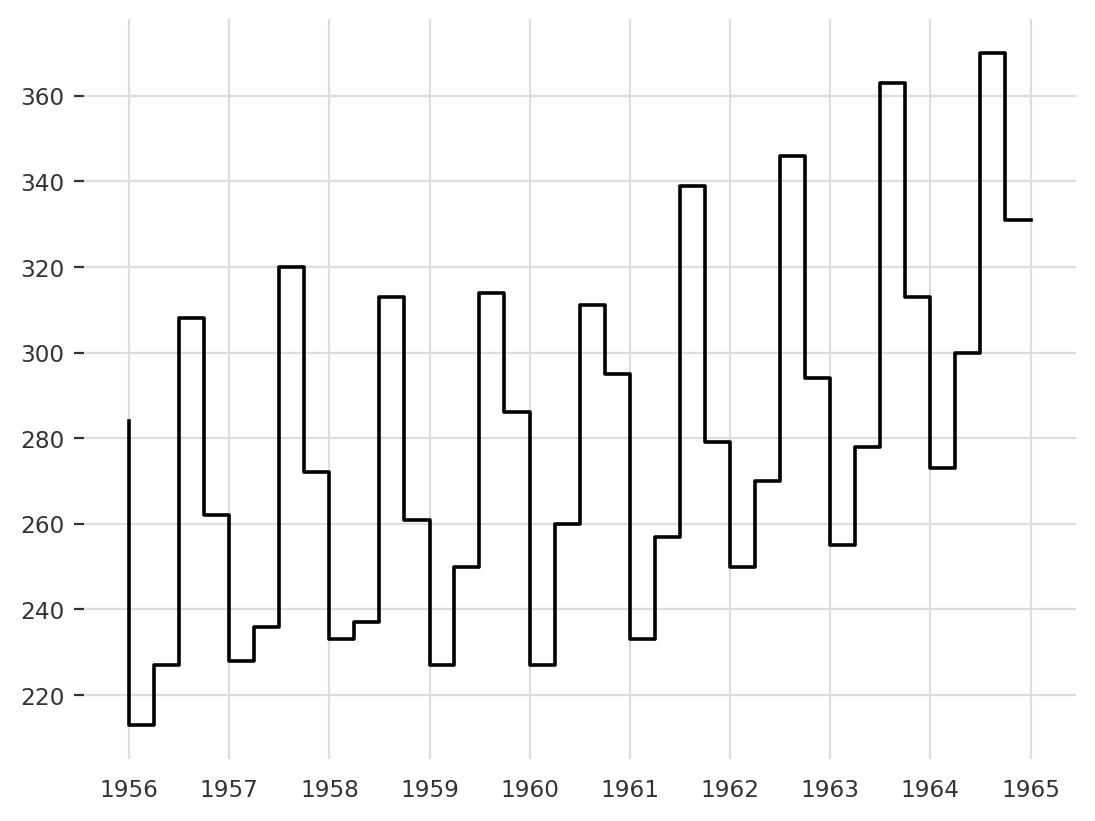

In [84]:
plt.step(
    x="date",
    y="Y",
    data=beer_dataset.pd_dataframe()[: pd.Timestamp(1965, 1, 1)].reset_index(),
)

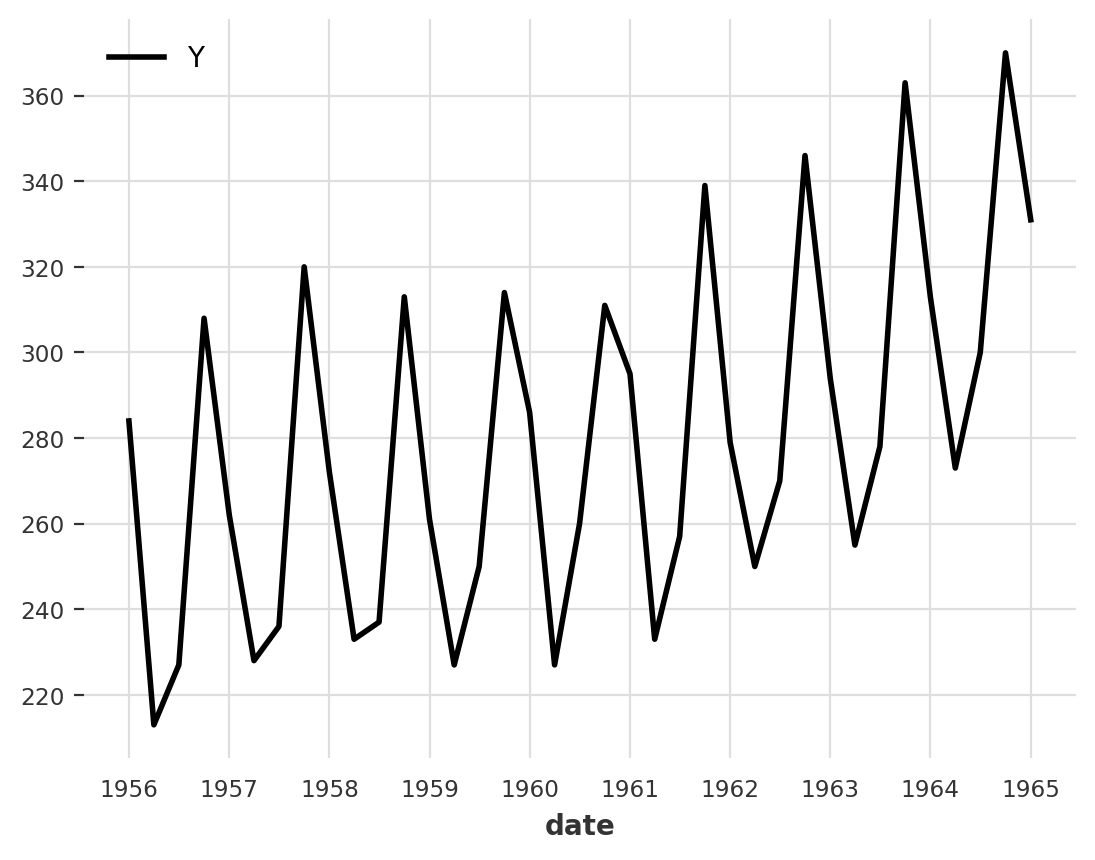

In [76]:
beer_dataset = ds.AusBeerDataset().load()[: pd.Timestamp(1965, 1, 1)]
beer_dataset.plot();

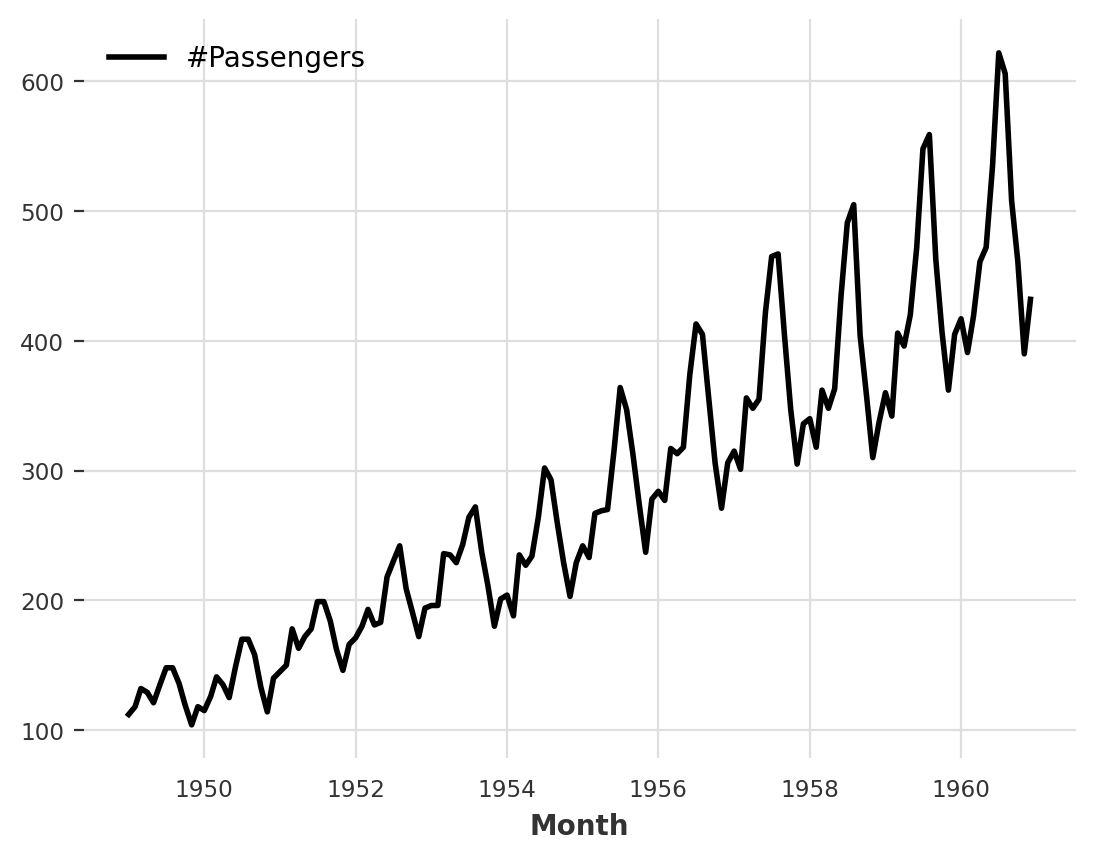

In [62]:
air_pax = ds.AirPassengersDataset().load()
air_pax.plot();

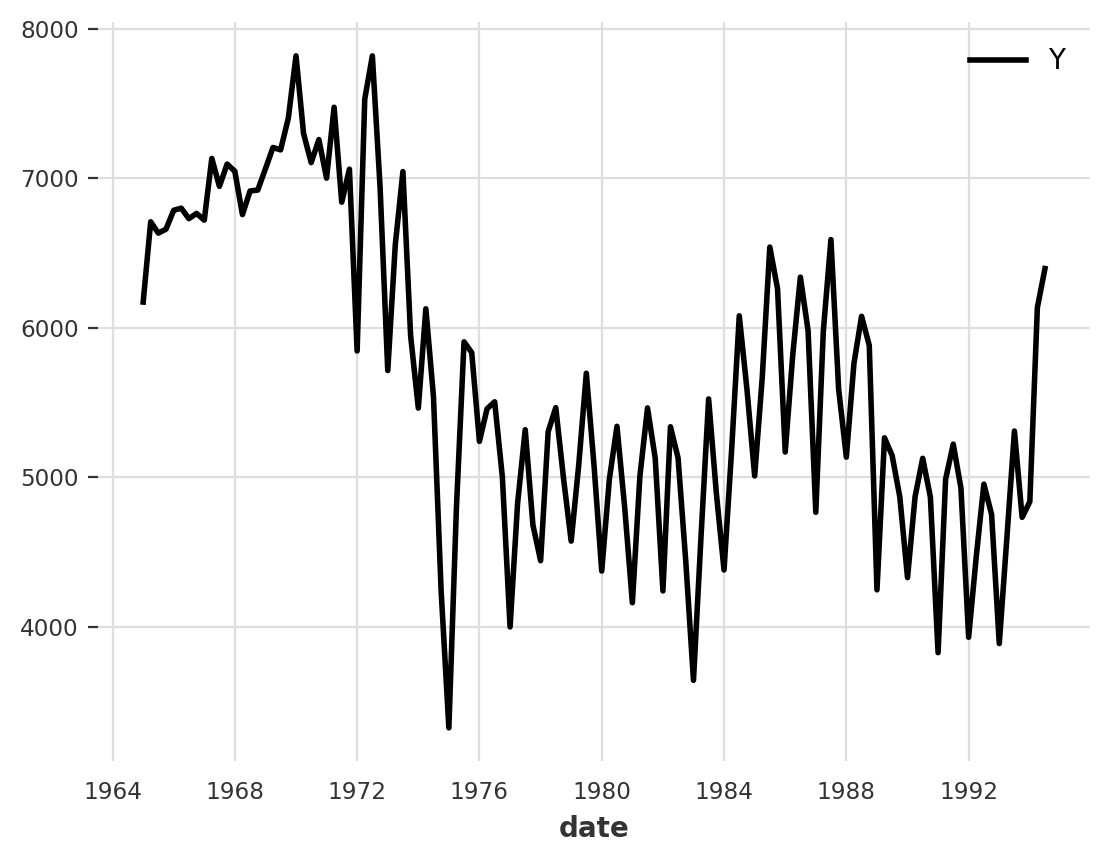

In [64]:
wool = ds.WoolyDataset().load()
wool.plot();

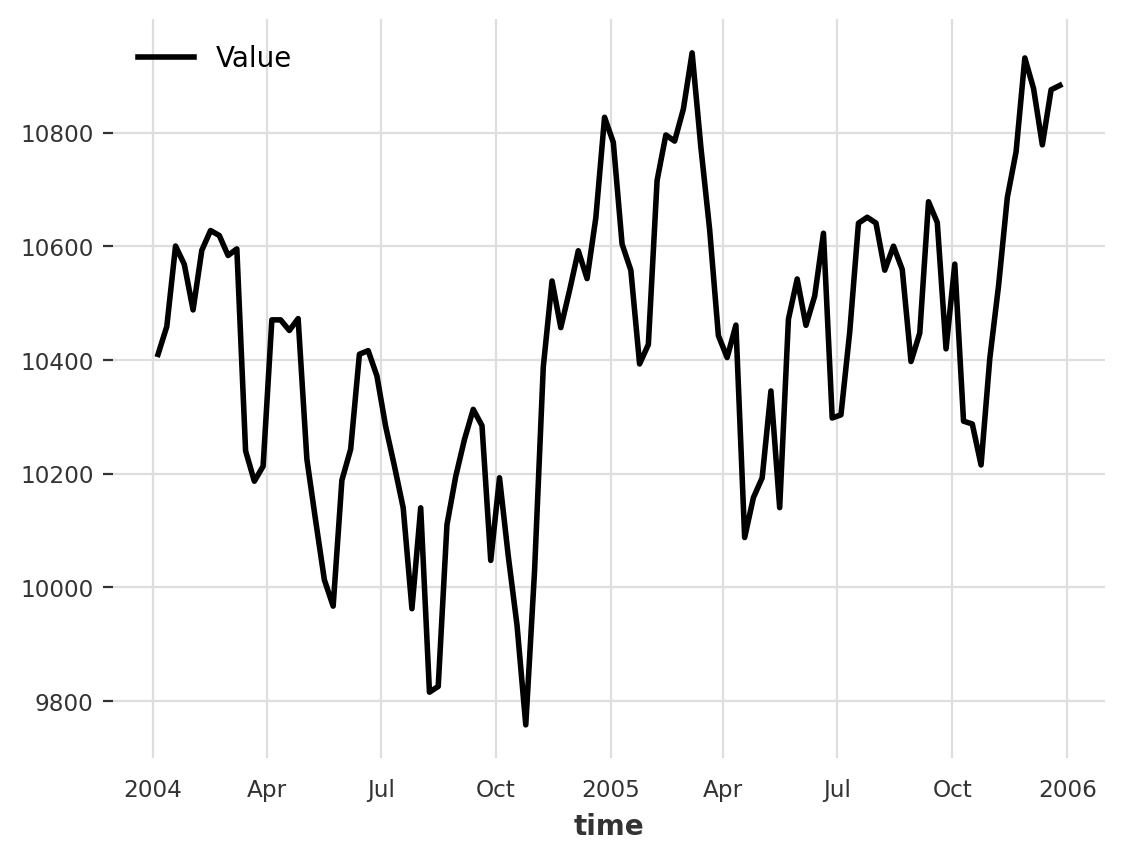

In [74]:
dowjones = pd.read_csv("/Users/nstulov/Downloads/archive/DowJones.csv")
dowjones["Date"] = pd.to_datetime(dowjones["Date"])
dowjones = dowjones.set_index("Date")[
    pd.Timestamp(2004, 1, 1) : pd.Timestamp(2006, 1, 1)
]
dowjones = dowjones.reindex(
    pd.date_range(dowjones.index.min(), dowjones.index.max(), freq="W-MON"),
    method="ffill",
)
dowjones = TimeSeries.from_dataframe(dowjones)
dowjones.plot();

## Correlogram

Sample autocorrelation at lag $k$:
$$
r_k = \frac{\sum_{t=1}^{T-k} (x_t - \bar{x}) (x_{t_k} - \bar{x})}{\sum_{t=1}^{T} (x_t - \bar{x})^2}
$$

A correlogram is a plot of the sample autocorrelation coefficients $r_k$ against the lag $k$.

## Examples

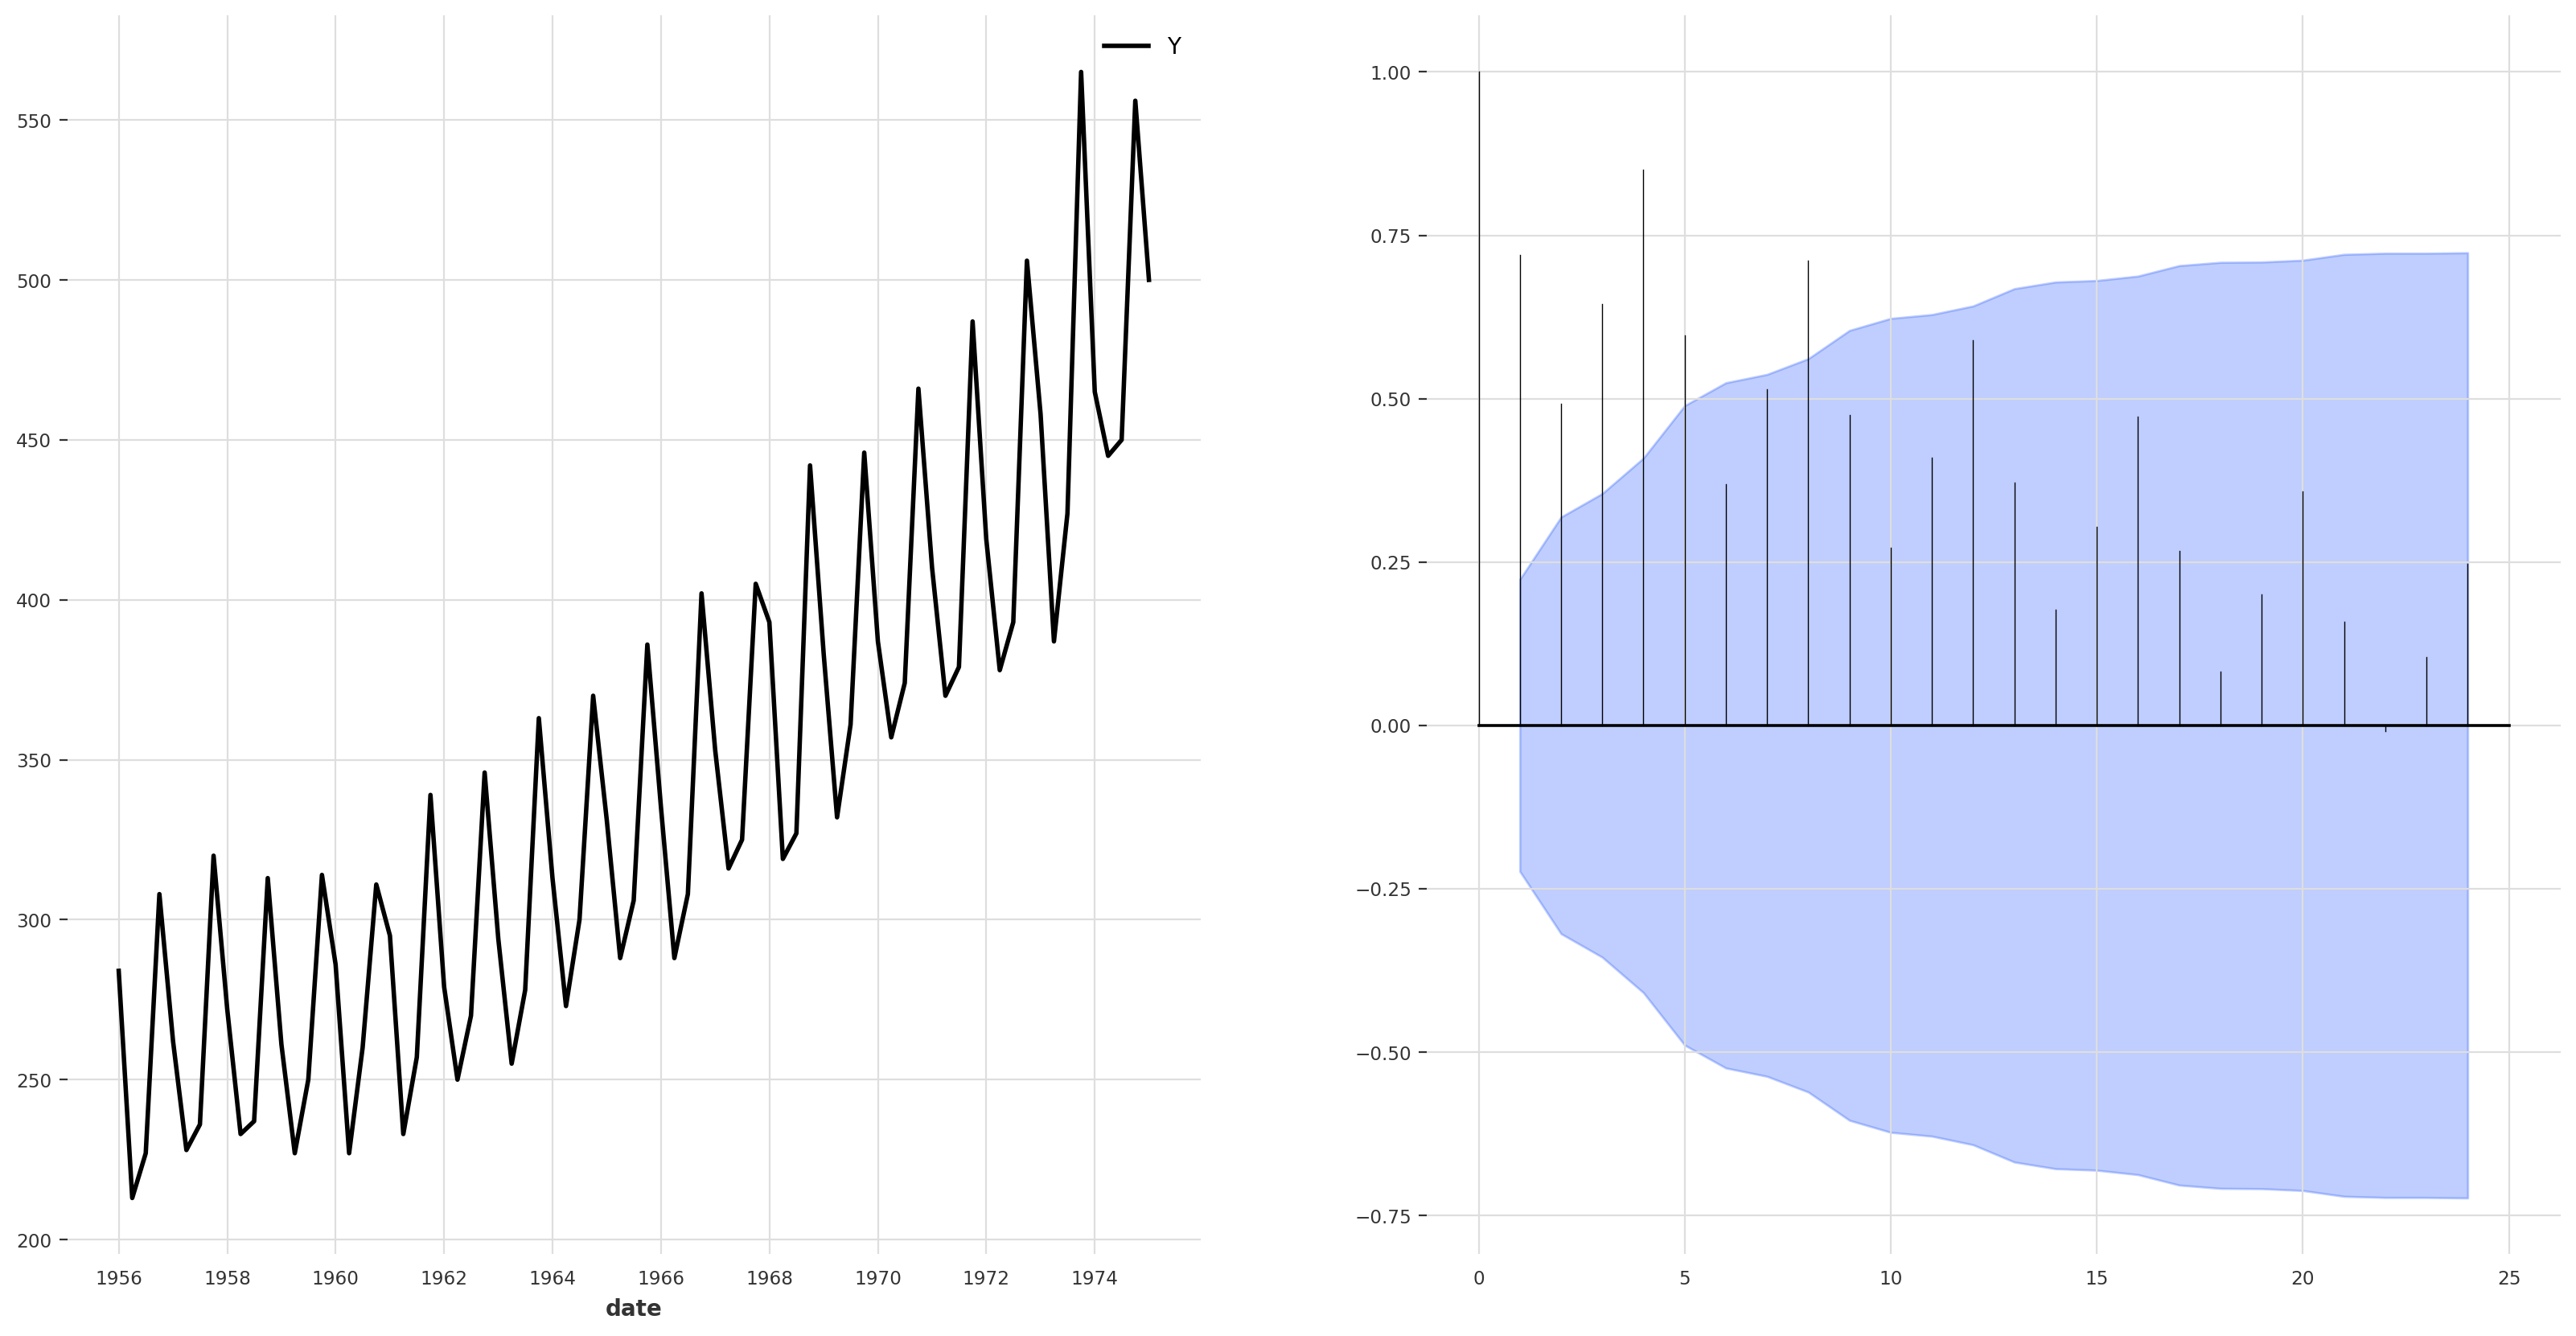

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
beer_dataset.plot(ax=ax[0])
plot_acf(beer_dataset, axis=ax[1])

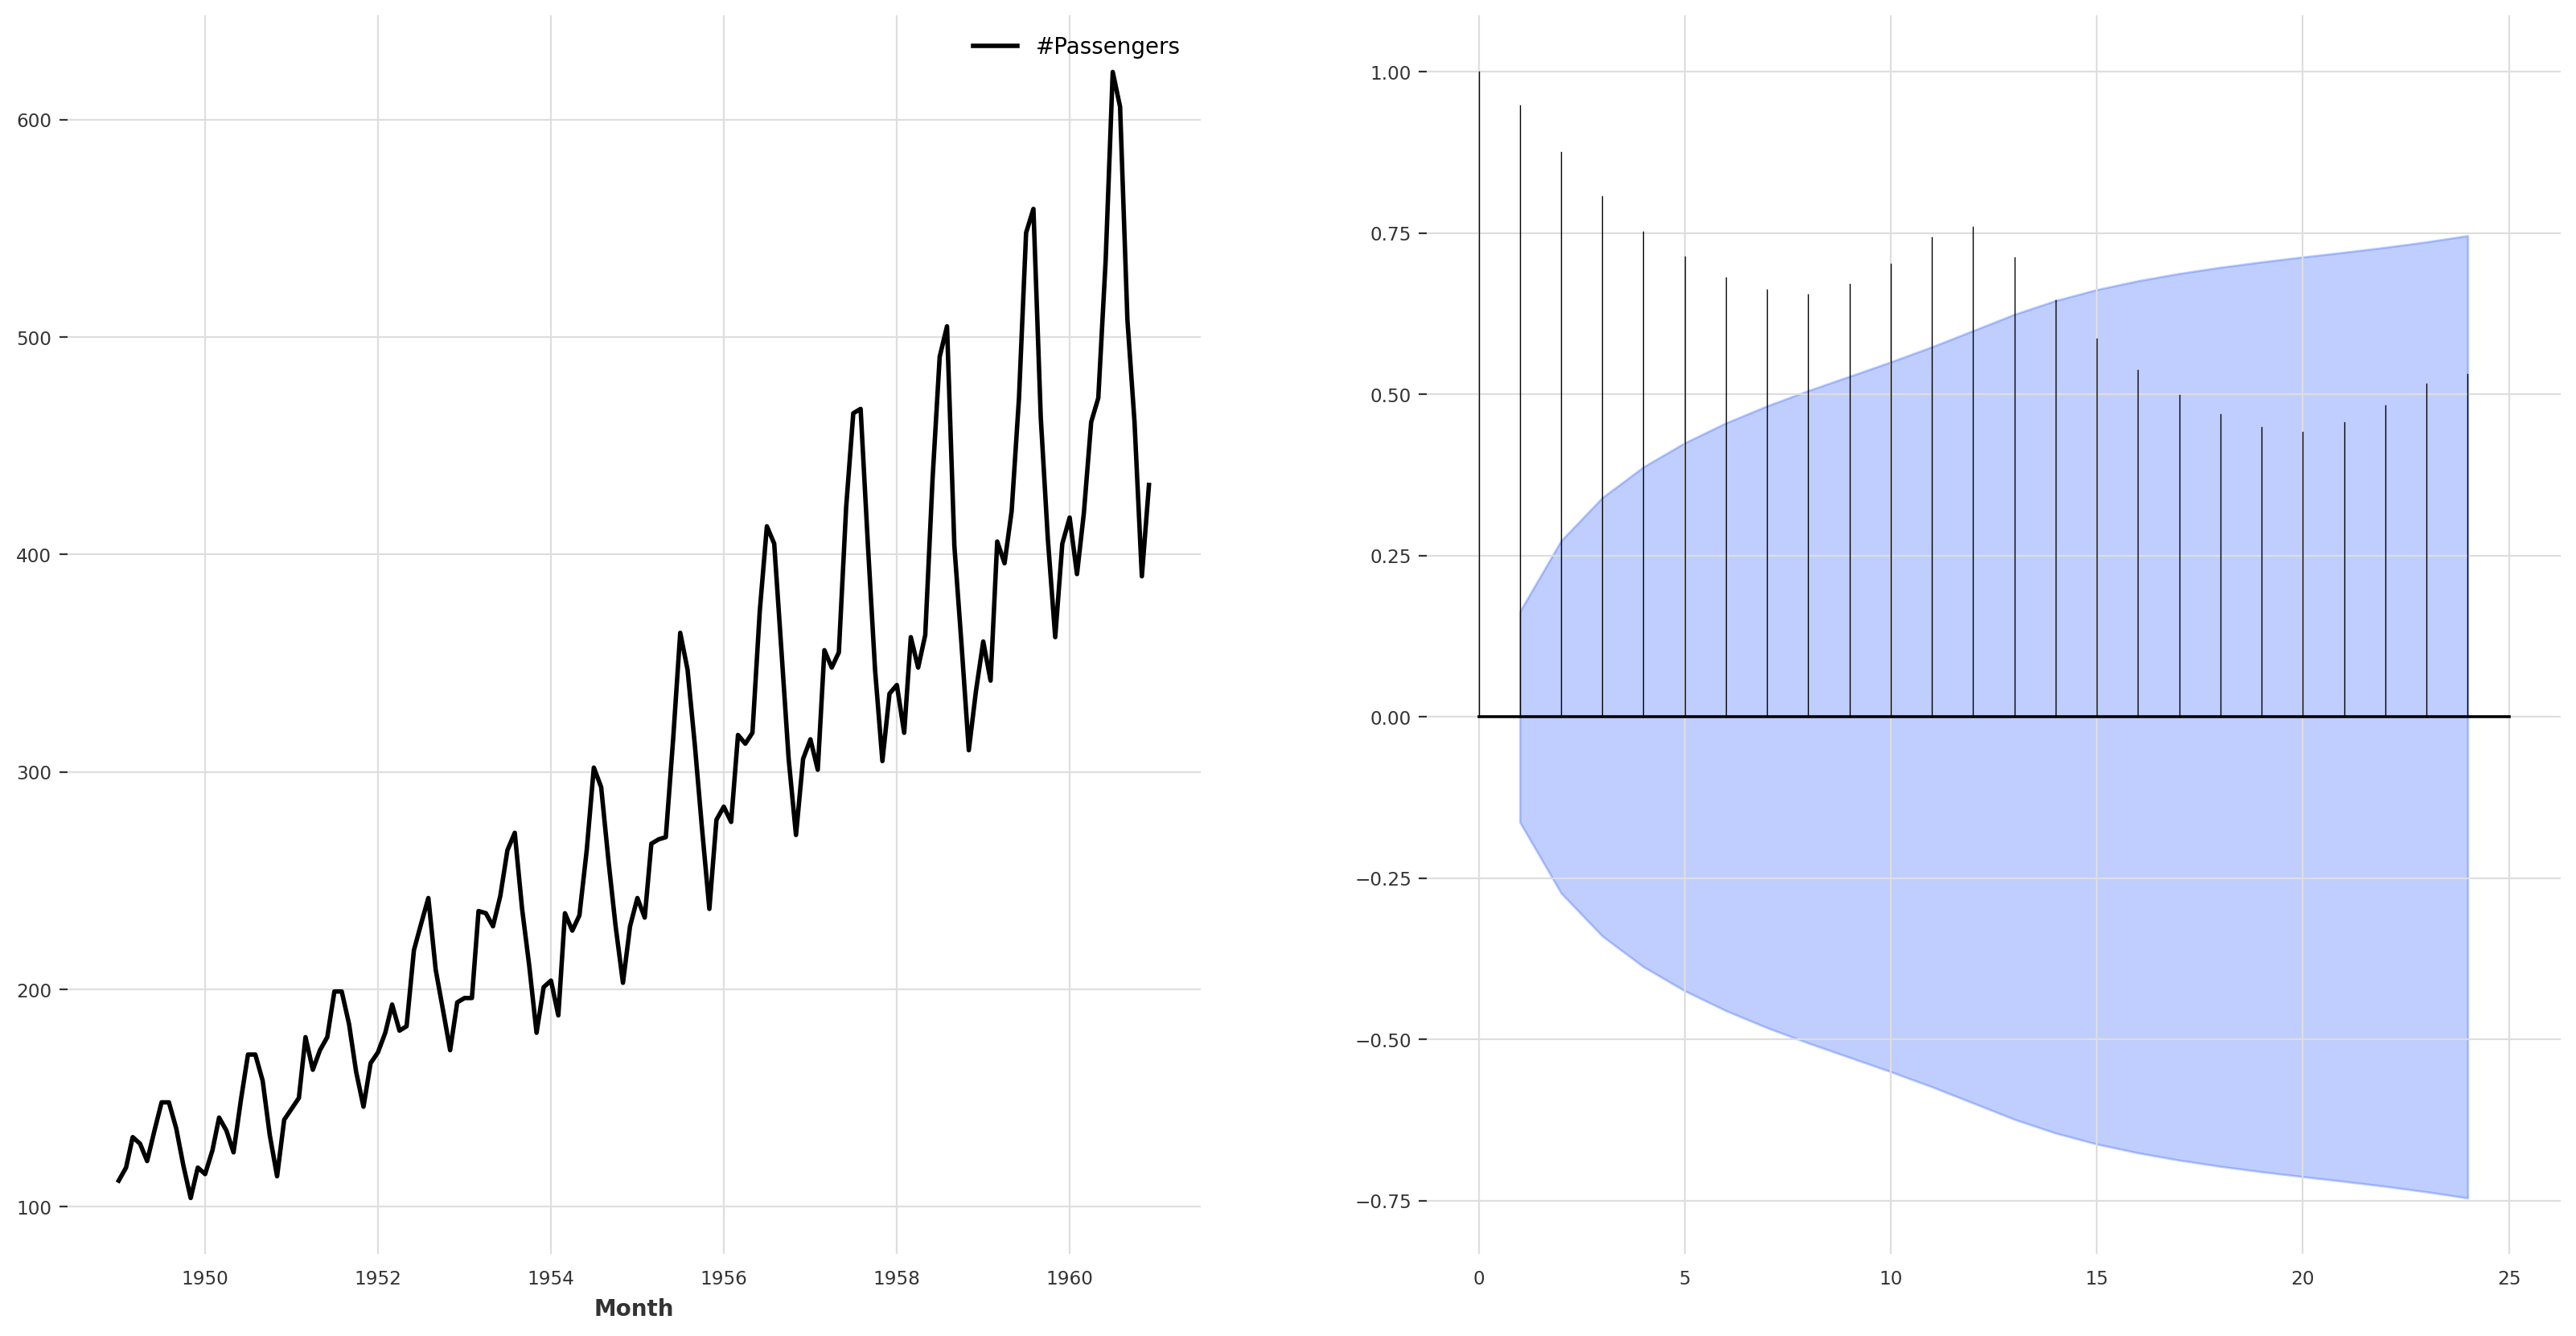

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
air_pax.plot(ax=ax[0])
plot_acf(air_pax, axis=ax[1])

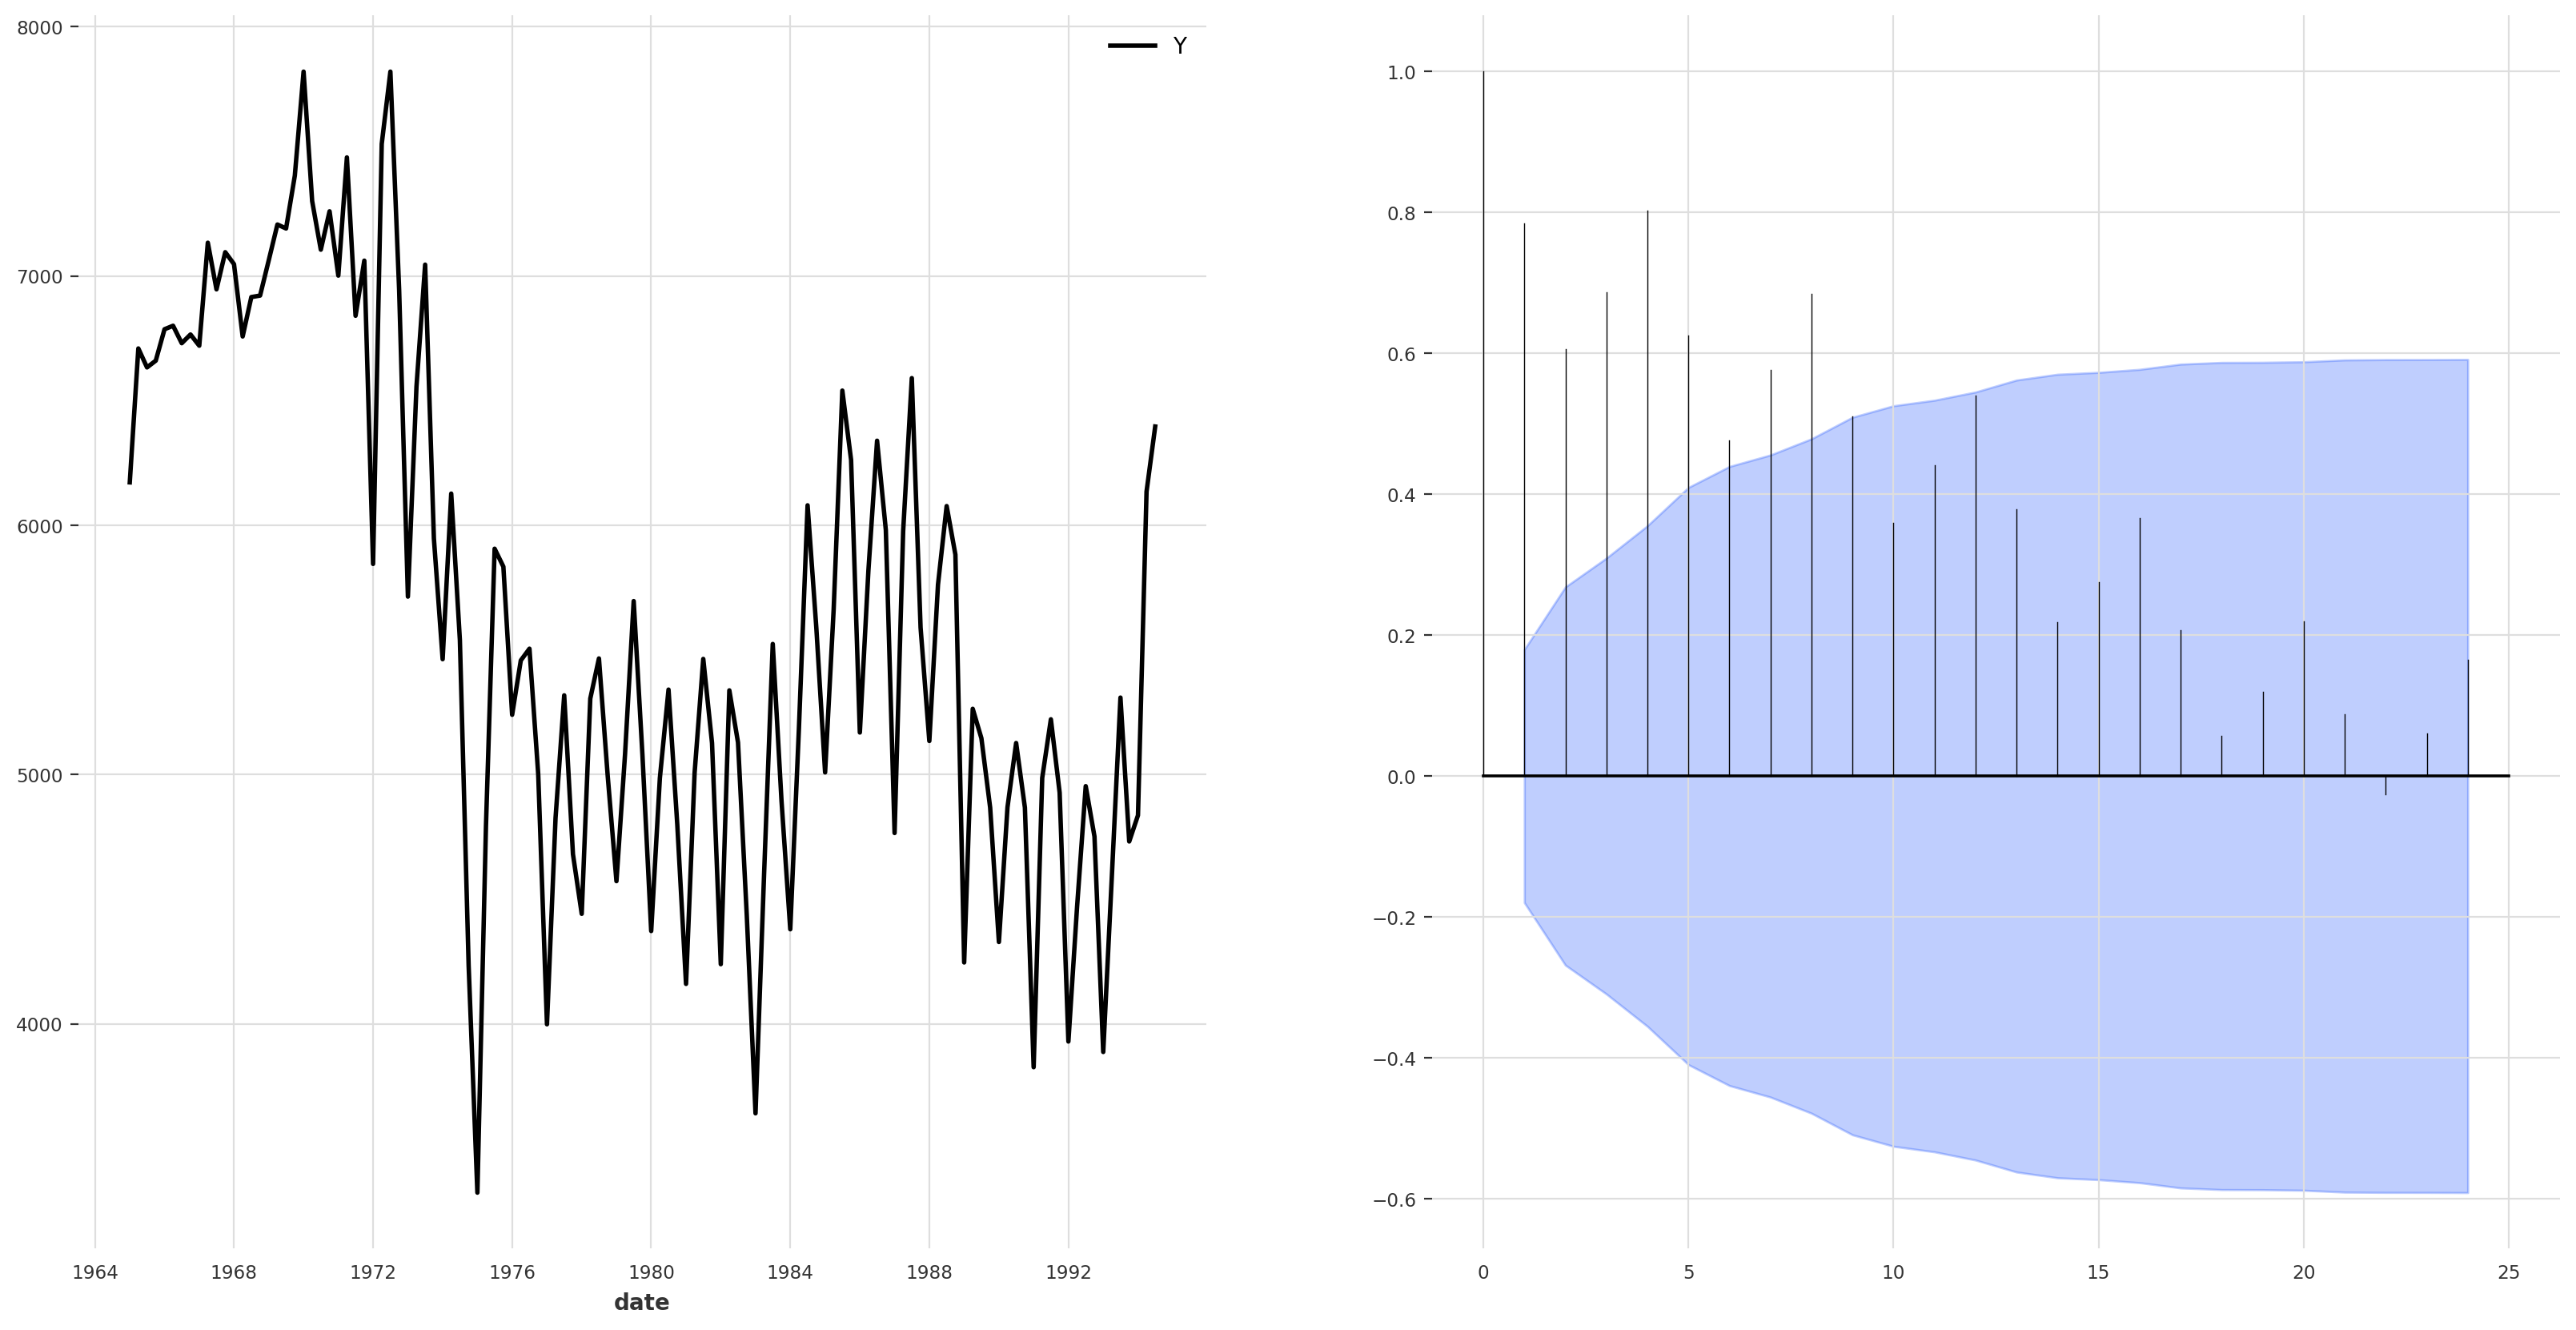

In [65]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
wool.plot(ax=ax[0])
plot_acf(wool, axis=ax[1])fig, ax = plt.subplots(1,2,figsize=(20,10))
wool.plot(ax=ax[0])
plot_acf(wool, axis=ax[1])

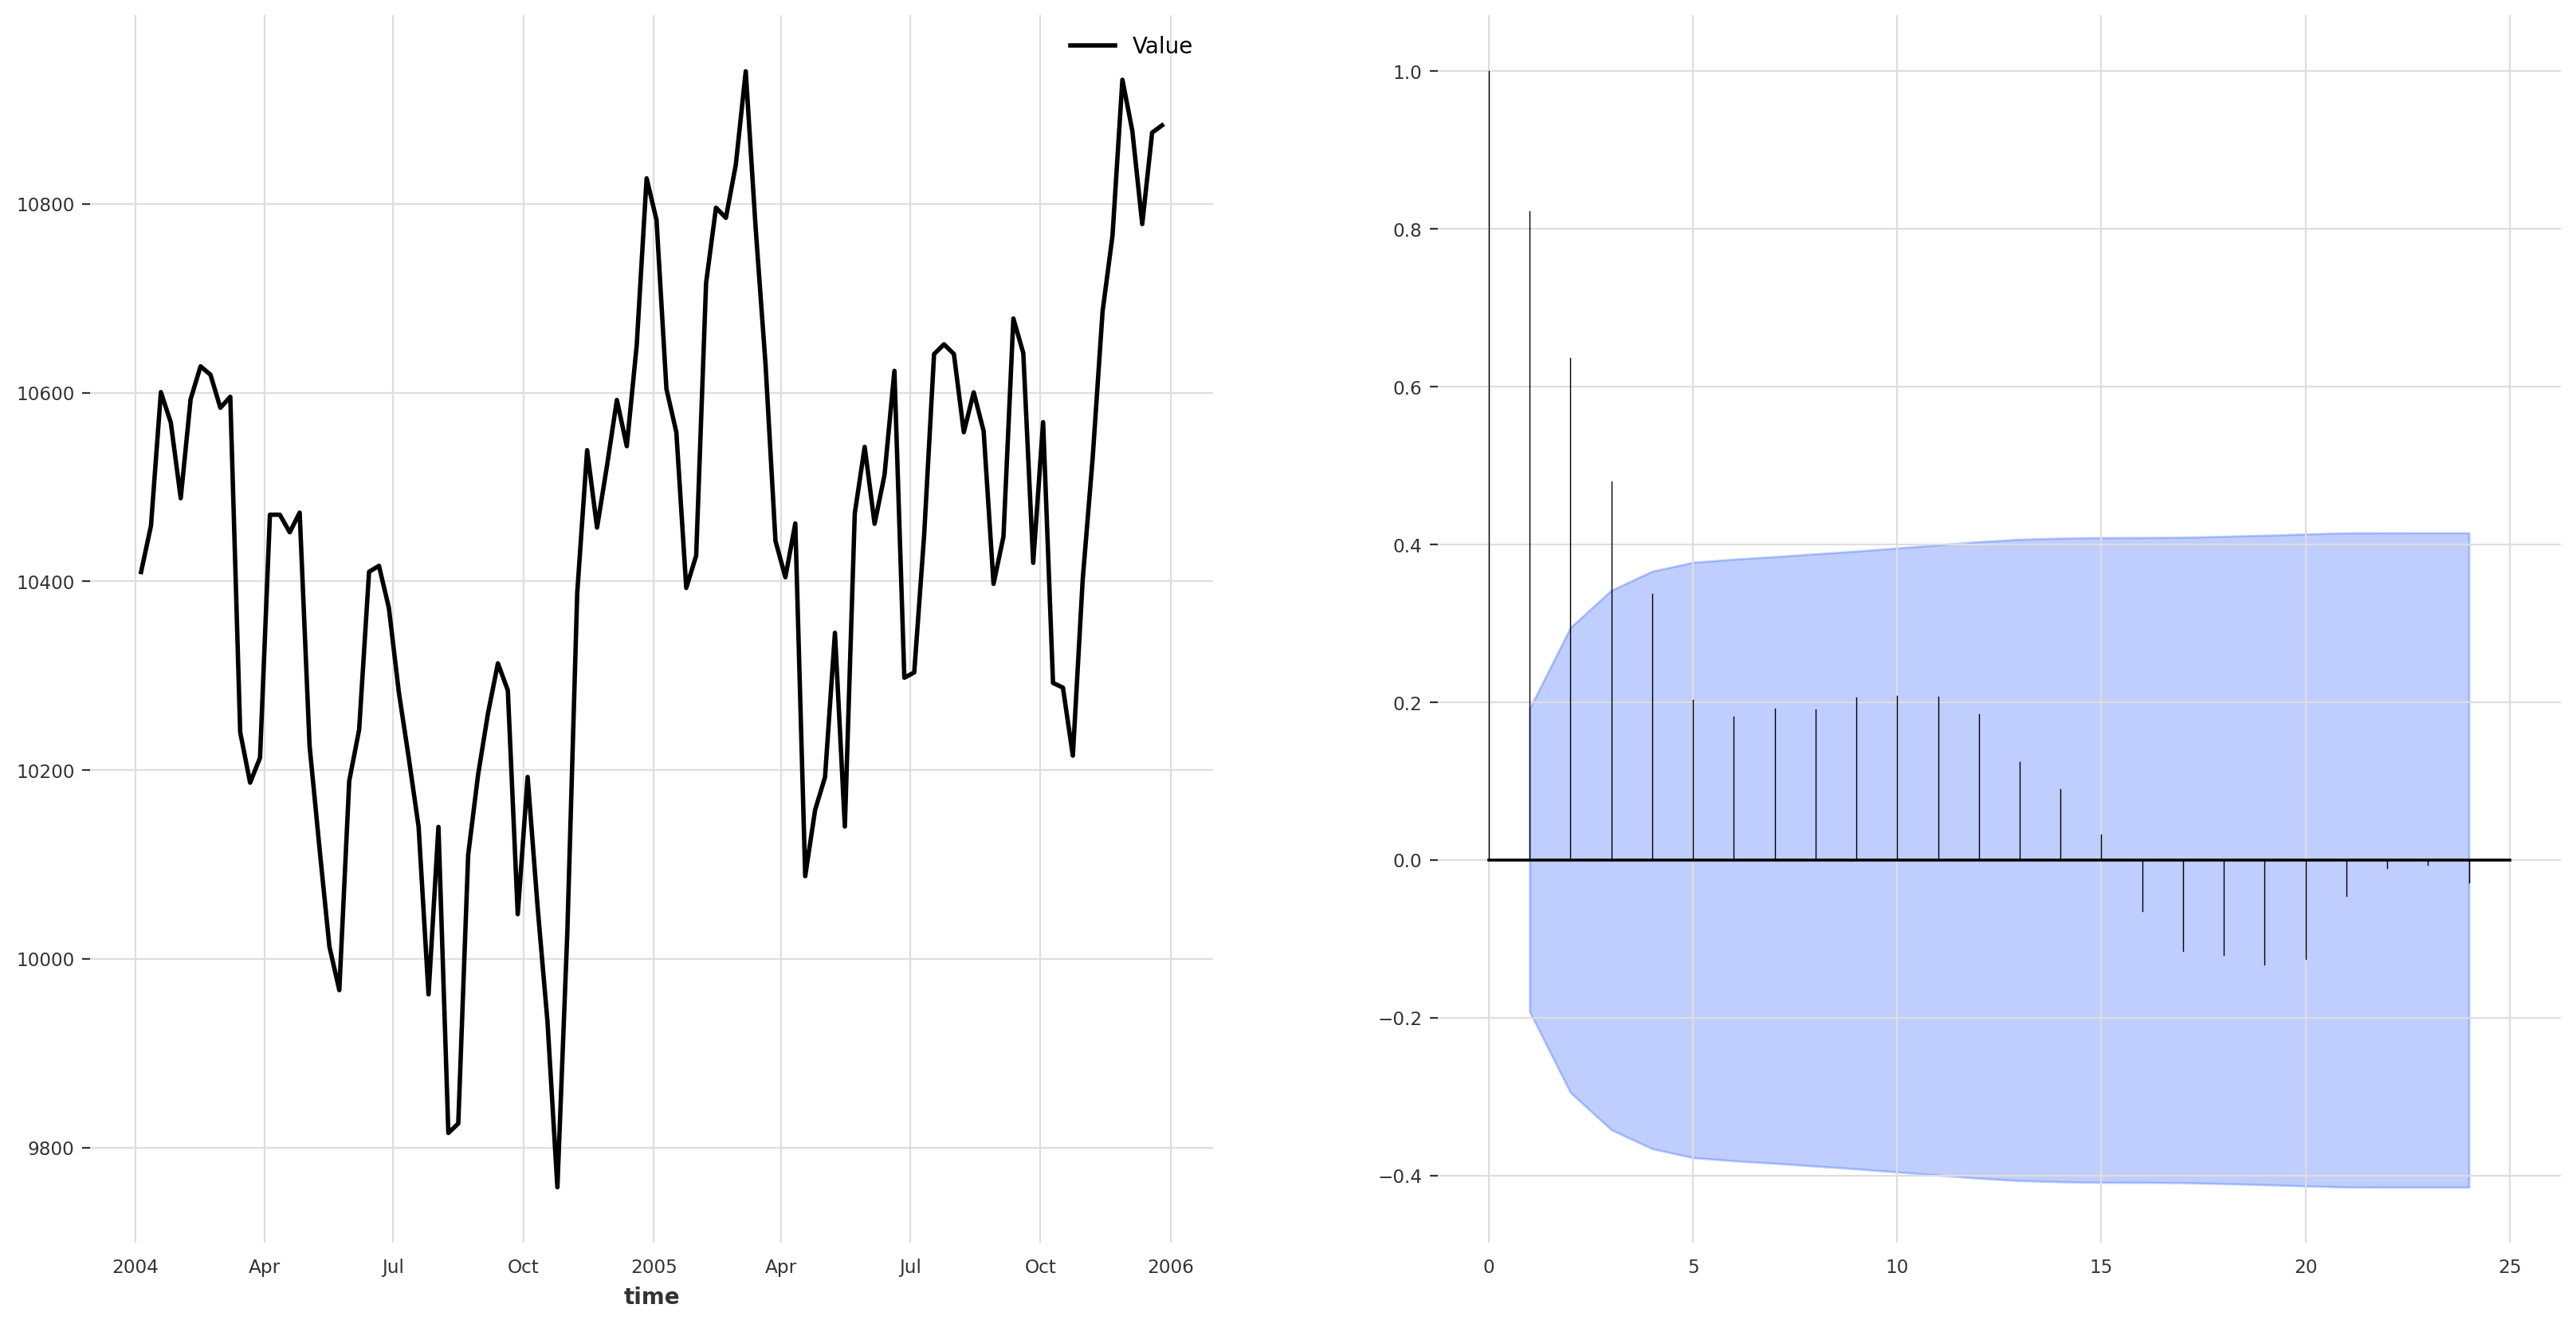

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
dowjones.plot(ax=ax[0])
plot_acf(dowjones, axis=ax[1])

In [92]:
x = np.arange(0, 40)
y = np.sin(0.5 * x)
sin_data = TimeSeries.from_dataframe(
    pd.DataFrame({"date": x, "value": y}), time_col="date"
)

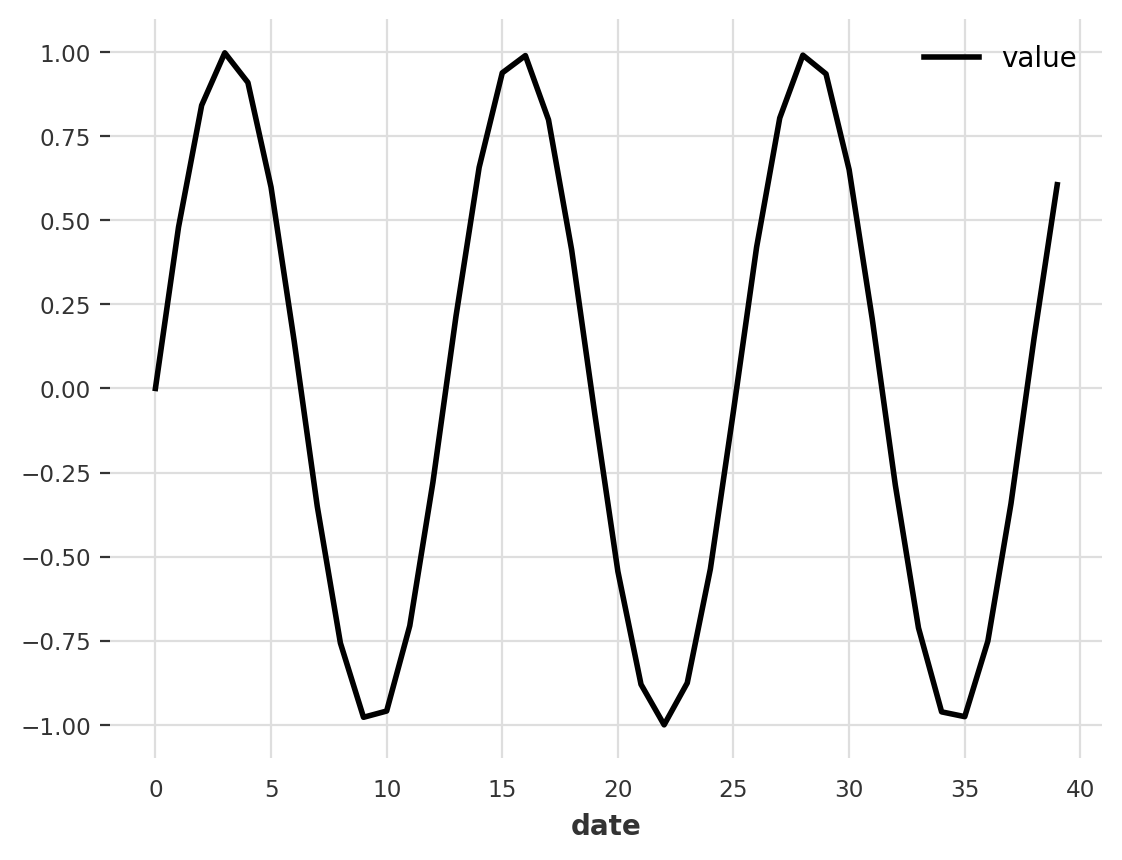

In [93]:
sin_data.plot();

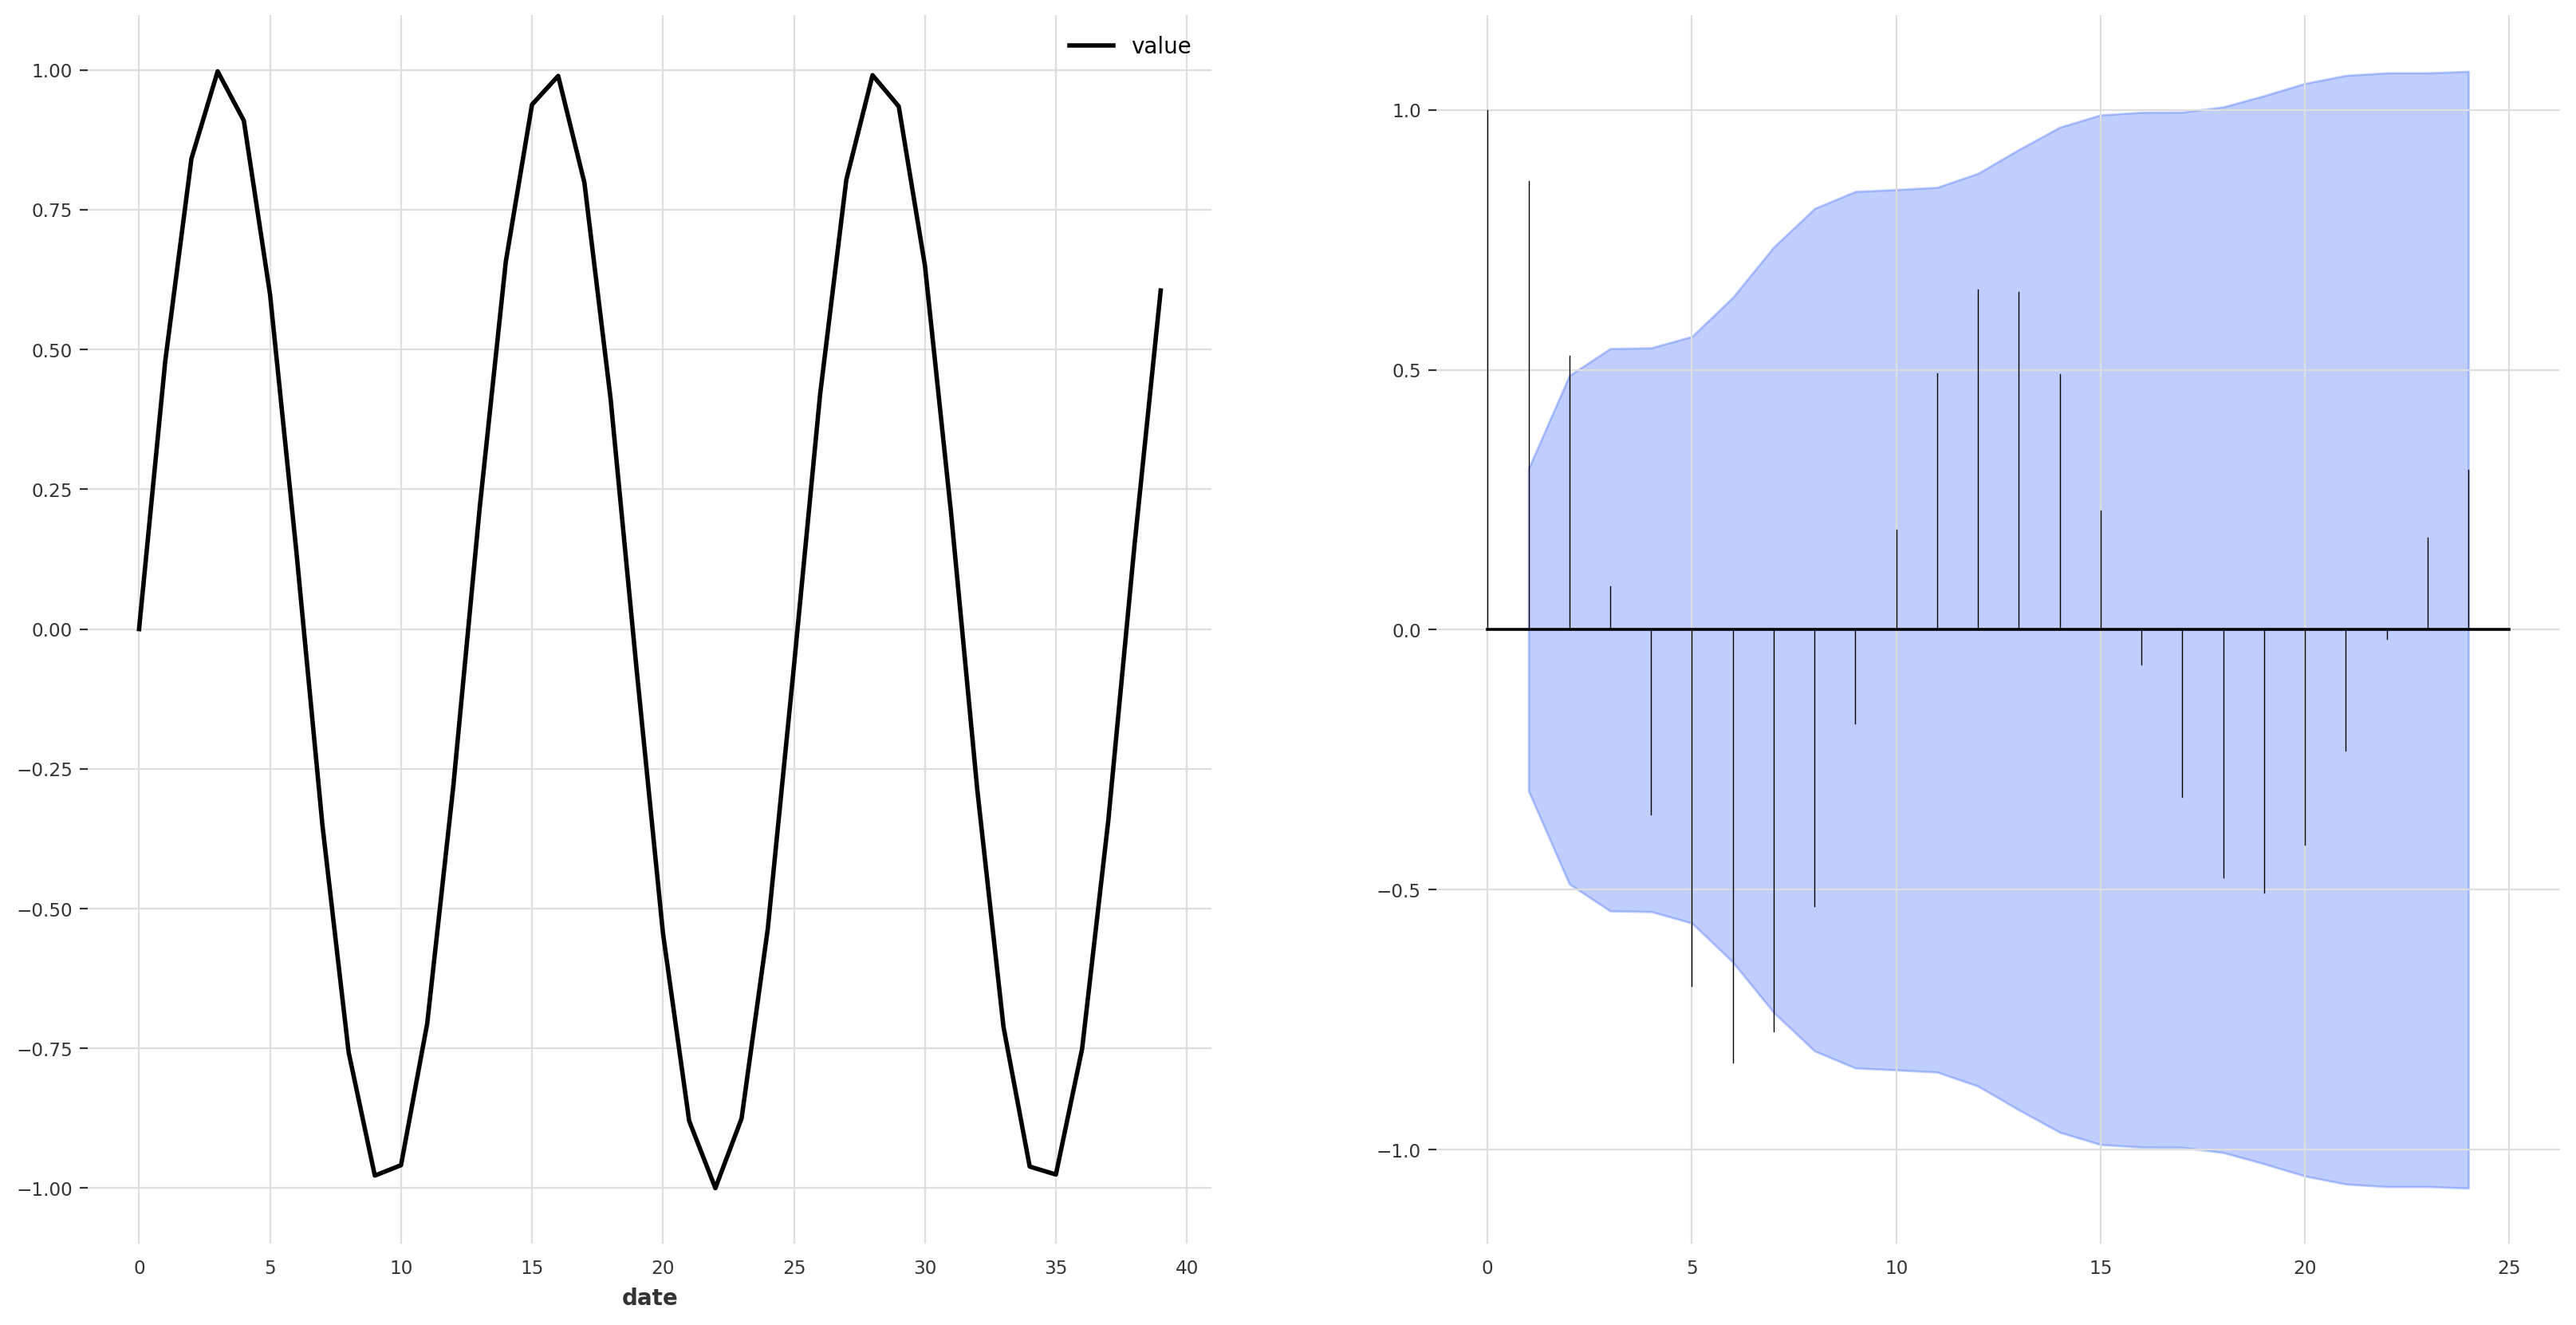

In [94]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
sin_data.plot(ax=ax[0])
plot_acf(sin_data, axis=ax[1])

## Stationarity

- Presense of trend means non-stationarity
- Presense of seasonality means non-stationarity
- Presense of cycles does not mean non-stationarity

## Examples

<img src="./stationary-or-not.png" height=200px></img>